In [1]:
import sys
!{sys.executable} -m pip install seaborn

  Using cached seaborn-0.11.2-py3-none-any.whl (292 kB)


In [2]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (10, 8)

import seaborn as sns
sns.set_theme(style="whitegrid")

In [3]:
countries_in_europe = pd.read_csv("../data/misc/countries_in_europe.csv").drop(columns=["zoom", "abbreviation", "continent"])
countries_to_filter = [
    "China", "United States of America", "India", "Brazil", "Canada", "Australia", "Republic of Korea", "Japan", "Mexico", "South Africa", "Argentina",
    "Chile", "Thailand", "Uruguay", "Chinese Taipei", "Viet Nam"
]

In [4]:
eleccap_on_grid = pd.read_csv(
    "../data/irena/ELECCAP_20211218-095028_on_grid.csv",
    encoding="latin-1", skiprows=2
).drop(columns=["Grid connection"])
eleccap_on_grid["Installed electricity capacity by country/area (MW)"] = pd.to_numeric(
    eleccap_on_grid["Installed electricity capacity by country/area (MW)"], errors="coerce"
)
eleccap_on_grid = eleccap_on_grid[~eleccap_on_grid["Country/area"].isin(countries_to_filter)]
eleccap_on_grid["Country/area"] = eleccap_on_grid["Country/area"].replace(["United Kingdom of Great Britain and Northern Ireland"], "United Kingdom")
eleccap_on_grid

,Country/area,Technology,Year,Installed electricity capacity by country/area (MW)
0,Afghanistan,On-grid Solar photovoltaic,2000,NaN
1,Afghanistan,On-grid Solar photovoltaic,2001,NaN
2,Afghanistan,On-grid Solar photovoltaic,2002,NaN
3,Afghanistan,On-grid Solar photovoltaic,2003,NaN
4,Afghanistan,On-grid Solar photovoltaic,2004,NaN
...,...,...,...,...
97897,Zimbabwe,Other non-renewable energy,2016,NaN
97898,Zimbabwe,Other non-renewable energy,2017,NaN
97899,Zimbabwe,Other non-renewable energy,2018,NaN
97900,Zimbabwe,Other non-renewable energy,2019,NaN


In [5]:
eleccap_on_grid["Technology"].unique()

array(['On-grid Solar photovoltaic', 'Off-grid Solar photovoltaic',
       'Concentrated solar power', 'Onshore wind energy',
       'Offshore wind energy', 'Renewable hydropower',
       'Mixed Hydro Plants', 'Pumped storage', 'Solid biofuels',
       'Renewable municipal waste', 'Liquid biofuels', 'Biogas',
       'Geothermal energy', 'Marine energy', 'Fossil fuels',
       'Coal and peat', 'Oil', 'Natural gas', 'Nuclear',
       'Fossil fuels n.e.s.', 'Other non-renewable energy'], dtype=object)

In [6]:
wind_mask = (eleccap_on_grid["Technology"] == "Onshore wind energy") | (eleccap_on_grid["Technology"] == "Offshore wind energy")
eleccap_on_grid_wind = eleccap_on_grid[wind_mask]

eleccap_on_grid_wind_2020 = (
    eleccap_on_grid_wind[eleccap_on_grid_wind["Year"] == 2020]
        .dropna()
        .sort_values(by="Installed electricity capacity by country/area (MW)", ascending=False)
        .reindex()
)
eleccap_on_grid_wind_2020

,Country/area,Technology,Year,Installed electricity capacity by country/area (MW)
34481,Germany,Onshore wind energy,2020,54437.00
82550,Spain,Onshore wind energy,2020,27083.84
31835,France,Onshore wind energy,2020,17379.85
92693,United Kingdom,Onshore wind energy,2020,14101.94
43742,Italy,Onshore wind energy,2020,10839.46
...,...,...,...,...
36245,Grenada,Onshore wind energy,2020,0.08
38891,Guyana,Onshore wind energy,2020,0.04
7580,Barbados,Onshore wind energy,2020,0.02
87842,Tokelau,Onshore wind energy,2020,0.02


In [7]:
onshore_wind_2020 = eleccap_on_grid_wind_2020[(eleccap_on_grid_wind_2020["Technology"] == "Onshore wind energy") &
                                              (eleccap_on_grid_wind_2020["Installed electricity capacity by country/area (MW)"] > 0)]
onshore_wind_2020

,Country/area,Technology,Year,Installed electricity capacity by country/area (MW)
34481,Germany,Onshore wind energy,2020,54437.00
82550,Spain,Onshore wind energy,2020,27083.84
31835,France,Onshore wind energy,2020,17379.85
92693,United Kingdom,Onshore wind energy,2020,14101.94
43742,Italy,Onshore wind energy,2020,10839.46
...,...,...,...,...
36245,Grenada,Onshore wind energy,2020,0.08
38891,Guyana,Onshore wind energy,2020,0.04
7580,Barbados,Onshore wind energy,2020,0.02
87842,Tokelau,Onshore wind energy,2020,0.02


In [8]:
onshore_wind_2020.head(n=15)

,Country/area,Technology,Year,Installed electricity capacity by country/area (MW)
34481,Germany,Onshore wind energy,2020,54437.00
82550,Spain,Onshore wind energy,2020,27083.84
31835,France,Onshore wind energy,2020,17379.85
92693,United Kingdom,Onshore wind energy,2020,14101.94
43742,Italy,Onshore wind energy,2020,10839.46
84755,Sweden,Onshore wind energy,2020,9485.00
89606,Turkey,Onshore wind energy,2020,8832.39
68438,Poland,Onshore wind energy,2020,6266.69
68879,Portugal,Onshore wind energy,2020,5213.75
24779,Denmark,Onshore wind energy,2020,4534.16


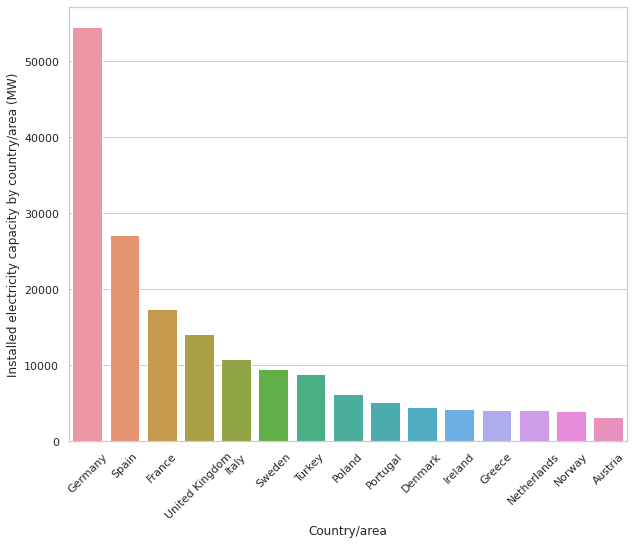

In [9]:
ax = sns.barplot(
    x="Country/area",
    y="Installed electricity capacity by country/area (MW)",
    data=onshore_wind_2020[onshore_wind_2020["Installed electricity capacity by country/area (MW)"] > 100].head(n=15)
)
plt.xticks(rotation=45)
plt.show()

In [10]:
offshore_wind_2020 = eleccap_on_grid_wind_2020[(eleccap_on_grid_wind_2020["Technology"] == "Offshore wind energy") &
                                               (eleccap_on_grid_wind_2020["Installed electricity capacity by country/area (MW)"] > 0)]
offshore_wind_2020

,Country/area,Technology,Year,Installed electricity capacity by country/area (MW)
92714,United Kingdom,Offshore wind energy,2020,10383.05
34502,Germany,Offshore wind energy,2020,7747.00
61403,Netherlands,Offshore wind energy,2020,2500.00
8483,Belgium,Offshore wind energy,2020,2253.90
24800,Denmark,Offshore wind energy,2020,1700.80
84776,Sweden,Offshore wind energy,2020,203.00
31415,Finland,Offshore wind energy,2020,73.00
42881,Ireland,Offshore wind energy,2020,25.20
68900,Portugal,Offshore wind energy,2020,25.00
82571,Spain,Offshore wind energy,2020,5.00


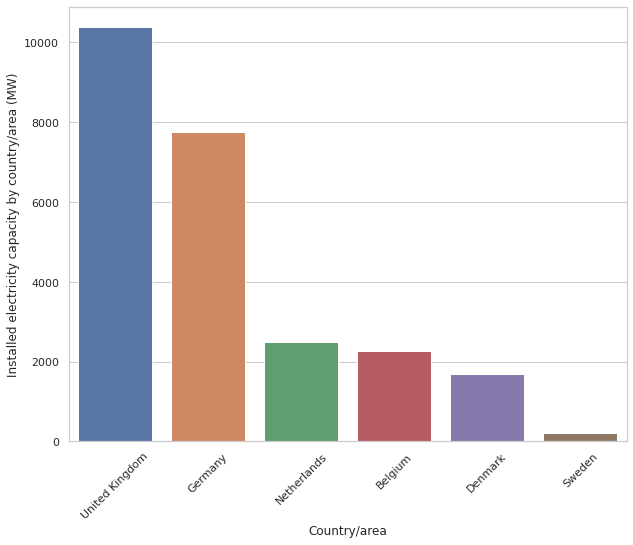

In [11]:
ax = sns.barplot(
    x="Country/area",
    y="Installed electricity capacity by country/area (MW)",
    data=offshore_wind_2020[offshore_wind_2020["Installed electricity capacity by country/area (MW)"] > 100]
)
plt.xticks(rotation=45)
plt.show()

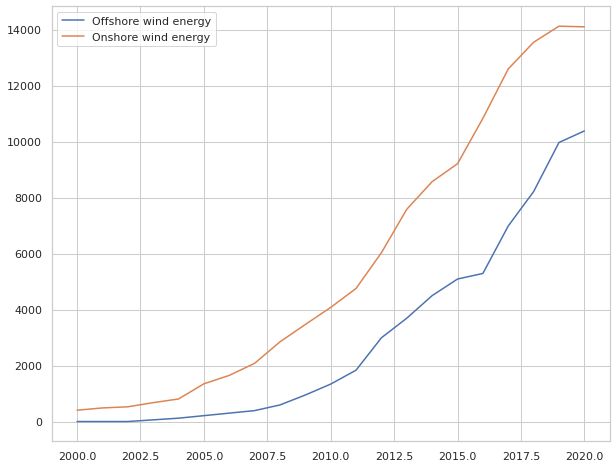

In [12]:
fig, ax = plt.subplots(1)
for key, group in eleccap_on_grid_wind[eleccap_on_grid_wind["Country/area"] == "United Kingdom"].groupby("Technology"):
    ax.plot(group["Year"], group["Installed electricity capacity by country/area (MW)"], label=f"{key}")
    
plt.legend(loc="best")
plt.show()

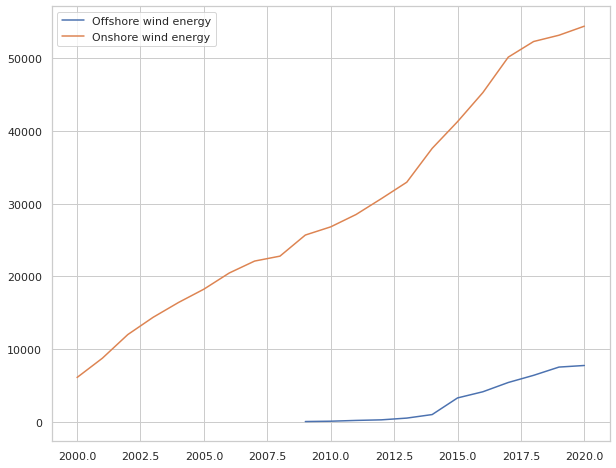

In [13]:
fig, ax = plt.subplots(1)
for key, group in eleccap_on_grid_wind[eleccap_on_grid_wind["Country/area"] == "Germany"].groupby("Technology"):
    ax.plot(group["Year"], group["Installed electricity capacity by country/area (MW)"], label=f"{key}")
    
plt.legend(loc="best")
plt.show()

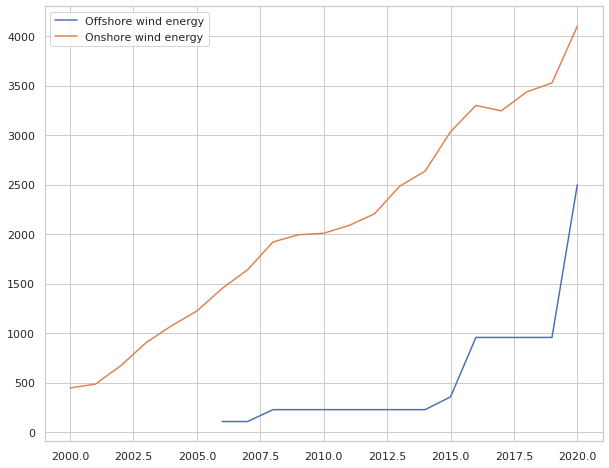

In [14]:
fig, ax = plt.subplots(1)
for key, group in eleccap_on_grid_wind[eleccap_on_grid_wind["Country/area"] == "Netherlands"].groupby("Technology"):
    ax.plot(group["Year"], group["Installed electricity capacity by country/area (MW)"], label=f"{key}")
    
plt.legend(loc="best")
plt.show()